In [94]:
from hepaid.hepdata import HEPDataSet
from pathlib import Path
from rich import print as pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns

colors = ['#FD841F','#F5C7A9', '#411530']
colors2 = ['#003f5c',' #003f5c'
'#58508d'
'#bc5090'
'#ff6361'
'#ffa600' ]


In [2]:
from hepaid.hepread import SLHA

In [3]:
slha = SLHA(file='/home/mjad1g20/HEP/SPHENO/test/SPheno.spc.BLSSM')

In [6]:
print(slha.block_list)

['SPINFO', 'MODSEL', 'MINPAR', 'EXTPAR', 'GAUGEGUT', 'SMINPUTS', 'GAUGE', 'BL', 'HMIX', 'MSOFT', 'PHASES', 'ANGLES', 'YD', 'YE', 'YU', 'YX', 'YV', 'TD', 'TE', 'TU', 'TX', 'TV', 'MSQ2', 'MSL2', 'MSD2', 'MSU2', 'MSE2', 'MV2', 'ADDPARS', 'MASS', 'DSQMIX', 'USQMIX', 'SELMIX', 'SNUMIXI', 'SNUMIXR', 'SCALARMIX', 'PSEUDOSCALARMIX', 'CHARGEMIX', 'NMIX', 'IMNMIX', 'UMIX', 'VMIX', 'UVMIX', 'IMUVMIX', 'UELMIX', 'UERMIX', 'UDLMIX', 'UDRMIX', 'UULMIX', 'UURMIX', 'SPHENO', 'HIGGSLHC7', 'HIGGSLHC8', 'HIGGSLHC13', 'HIGGSLHC14', 'HIGGSFCC100', 'HIGGSCOUPLINGSFERMIONS', 'HIGGSCOUPLINGSBOSONS', 'HPPLOOPS', 'EFFHIGGSCOUPLINGS', 'SPHENOLOWENERGY', 'FLAVORKITQFV', 'FLAVORKITLFV', 'FWCOEF', 'IMFWCOEF', 'DECAY 1000001', 'DECAY 1000003', 'DECAY 1000005', 'DECAY 2000001', 'DECAY 2000003', 'DECAY 2000005', 'DECAY 1000002', 'DECAY 1000004', 'DECAY 1000006', 'DECAY 2000002', 'DECAY 2000004', 'DECAY 2000006', 'DECAY 1000011', 'DECAY 1000013', 'DECAY 1000015', 'DECAY 2000011', 'DECAY 2000013', 'DECAY 2000015', 'DECA

In [7]:
slha['HIGGSCOUPLINGSBOSONS']

Block HiggsCouplingsBosons # 
    9.98693170E-01        3             25        24        24 # h_1 W W coupling 
    9.98783933E-01        3             25        23        23 # h_1 Z Z coupling  
    0.00000000E+00        3             25        23        22 # h_1 Z gamma coupling 
    1.13710852E+00        3             25        22        22 # h_1 gamma gamma coupling 
    1.00450495E+00        3             25        21        21 # h_1 g g coupling 
    0.00000000E+00        4             25        21        21        23 # h_1 g g Z coupling 
    5.09912683E-02        3             35        24        24 # h_2 W W coupling 
    5.09975280E-02        3             35        23        23 # h_2 Z Z coupling  
    0.00000000E+00        3             35        23        22 # h_2 Z gamma coupling 
    5.79638479E-02        3             35        22        22 # h_2 gamma gamma coupling 
    4.84288120E-02        3             35        21        21 # h_2 g g coupling 
    0.00000000E+00 

# BLSSM

In [6]:
blssm = HEPDataSet()

In [7]:
directory = Path('/mainfs/scratch/mjad1g20/ParameterScan/datasets/diphoton_paper/BLSSM')
blssm.load_from_directory(directory, percentage=1.)

Output()

EOFError: corrupted files:  110


In [8]:
print(blssm)
blssm.complete_stack_ids[:10]

HEPDataSet. Size = 25056. Complete Stack Points = 8045


[0, 7, 14, 15, 18, 19, 20, 22, 23, 24]

In [8]:

idxs = blssm.complete_stack_ids
masses_35 = np.zeros(len(idxs))
masses_25 = np.zeros(len(idxs))
ggF_35 = np.zeros(len(idxs))
obsratios = np.zeros(len(idxs))
csqtotal = np.zeros(len(idxs))
pvalue = np.zeros(len(idxs))
for i,j in enumerate(idxs):
    masses_35[i] = blssm[j]['SLHA']['MASS'][35]
    masses_25[i] = blssm[j]['SLHA']['MASS'][25]
    obsratios[i] = blssm[j]['HiggsBounds']['obsratio']
    csqtotal[i] = blssm[j]['HiggsSignals']['csq(tot)']
    pvalue[i] = blssm[j]['HiggsSignals']['Pvalue']

In [9]:
df = pd.DataFrame({'$H_{25}$': masses_25, '$h_{35}$': masses_35, 'obsratios':np.log(obsratios), '$\chi^2_{total}$':csqtotal})
filtered_df = df.loc[df['$h_{35}$'] < 130]
filtered_df = filtered_df.loc[filtered_df['$h_{35}$'] > 120]

In [96]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_palette("Blues_r")

#sns.pairplot(df,corner=True)

g = sns.pairplot(
    filtered_df, 
    diag_kind="kde",
    corner=True, 
    plot_kws=dict(marker=".", s=2, edgecolor="none"), 
    diag_kws=dict(fill=True),
    height=1.5,
    )

for ax in g.axes.ravel().reshape(4,4)[1:,1]:
    ax.axvline(x=125, ls='--', linewidth=1.5, c=colors[1])
for ax in g.axes.ravel().reshape(4,4)[:,0]:
    ax.axvline(x=96, ls='--', linewidth=1.5, c=colors[1])

g.map_lower(sns.kdeplot, levels=5, cmap='flare_r', linewidths=0.8)
plt.show()

NameError: name 'filtered_df' is not defined

## $\gamma \gamma$

#### Feature finder 

In [9]:
def _get_recursive(obj, args, default=None):
    """Apply successive requests to an obj that implements __getitem__ and
    return result if something is found, else return default"""
    for a in args:
        try:
            obj = obj.__getitem__(a)
        except:
            obj = None
            break
    return obj

def feature_vector(database, args):
    feature_array = []
    for i in range(len(database)):
        feature_array.append(_get_recursive(database[i], args))
    return feature_array
    

In [44]:

m0 = feature_vector(blssm, ['LHE', 'MINPAR', 'entries', '1', 'value'])
m12 = feature_vector(blssm, ['LHE', 'MINPAR', 'entries', '2', 'value'])
Azero = feature_vector(blssm, ['LHE', 'MINPAR', 'entries', '5', 'value'])
tanbeta = feature_vector(blssm, ['LHE', 'MINPAR', 'entries', '3', 'value'])

input_df = pd.DataFrame({
    'm0': m0,  
    'm12': m12,
    'Azero': Azero, 
    'tanbeta': tanbeta, 
    }).astype(float)


In [50]:
df_input_final = input_df.loc[final_idxs]

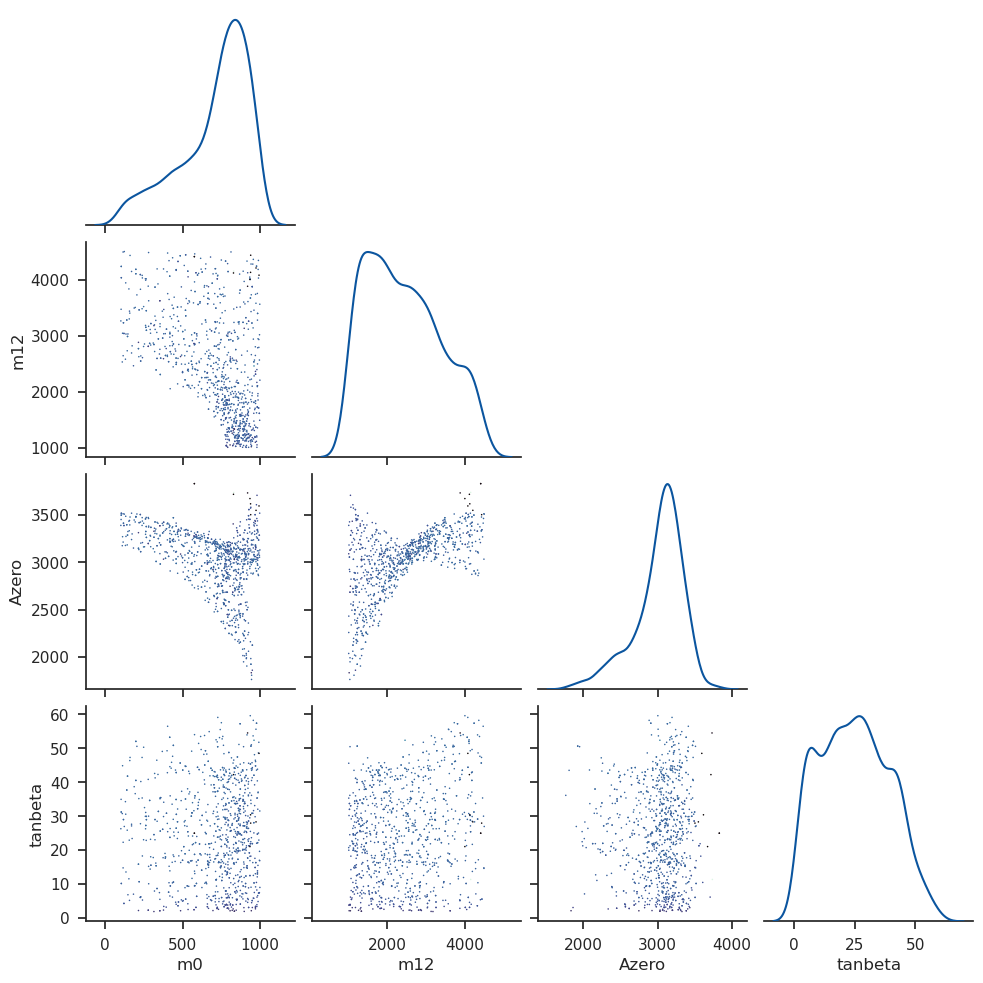

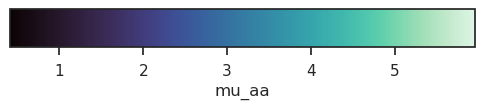

In [98]:
g = corner_plot(df_input_final,y=df_mus['mu_aa'], labels=None, cmap='mako')
create_cbar(df_mus['mu_aa'].min(), df_mus['mu_aa'].max(), 'mako', 'mu_aa')


In [77]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def create_cbar(vmin, vmax, cmap, label):
    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)

    #cmap = mpl.cm.cool
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')
    cb1.set_label(label)
    fig.show()

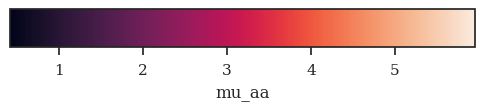

In [78]:
create_cbar(df_mus['mu_aa'].min(), df_mus['mu_aa'].max(), cmap='rocket', label='mu_aa')

In [35]:
_get_recursive(blssm[2], ['SLHA', 'DECAY1L 25', [2,22,22]])

Entry not found


In [23]:
br_25_22_22 = feature_vector(blssm, ['SLHA', 'DECAY1L 25', 'entries', '2,22,22', 'value'])
br_35_22_22 = feature_vector(blssm, ['SLHA', 'DECAY1L 35','entries', '2,22,22', 'value'])
br_25_5_5 = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSFERMIONS','entries','3,25,5,5', 'value'])
br_35_5_5 = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSFERMIONS','entries', '3,25,5,5', 'value'])
mass_35 = feature_vector(blssm, ['SLHA', 'MASS', 'entries','35', 'value'])
mass_25 = feature_vector(blssm, ['SLHA', 'MASS', 'entries','25', 'value'])
c_h25tt = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSFERMIONS','entries','3,25,6,6', 'value'])
c_h35tt = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSFERMIONS','entries','3,25,6,6', 'value'])
c_h35ZZ = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSBOSONS','entries','3,25,23,23', 'value'])




In [26]:
dff= pd.DataFrame({
    '$BR_{BLSSM}(h25-\gamma\gamma)$': br_25_22_22,
    '$BR_{BLSSM}(h35-\gamma\gamma)$': br_35_22_22,
    '$BR_{BLSSM}(h25-b\overline{b})$': br_25_5_5,
    '$BR_{BLSSM}(h35-b\overline{b})$': br_35_5_5,
    '$m_{h_{35}}$':mass_35,
    '$m_{h_{25}}$':mass_25,
    #'c_h25tt':c_h25tt,
    '$c_{h_{35}tt}$':c_h35tt,
    '$c_{h_{35}ZZ}$':c_h35ZZ
    })
dff= pd.DataFrame({
    'h25_aa': br_25_22_22,
    'h35_aa': br_35_22_22,
    'h25_bb': br_25_5_5,
    'h35_bb': br_35_5_5,
    'mh35':mass_35,
    'mh25':mass_25,
    #'c_h25tt':c_h25tt,
    'c_h35tt':c_h35tt,
    'c_h35ZZ':c_h35ZZ
    })


In [27]:
dff

h25_aa h35_aa              h25_bb              h35_bb  \
0      [0.00453807919]   None  [0.898605394, 0.0]  [0.898605394, 0.0]   
1                 None   None                None                None   
2                 None   None                None                None   
3                 None   None                None                None   
4                 None   None                None                None   
...                ...    ...                 ...                 ...   
25051             None   None                None                None   
25052             None   None                None                None   
25053             None   None                None                None   
25054             None   None                None                None   
25055             None   None                None                None   

               mh35          mh25             c_h35tt        c_h35ZZ  
0      [127.299353]  [114.459626]  [0.889195157, 0.0]  [0.889284539]  
1              None          None                None           None  
2              None          None                None           None  
3              None          None                None           None  
4              None          None                None           None  
...             ...           ...                 ...            ...  
25051          None          None                None           None  
25052          None          None                None           None  
25053          None          None                None           None  
25054          None          None                None           None  
25055          None          None                None           None  

[25056 rows x 8 columns]

In [28]:
df_final = dff.dropna()
df_final

h25_aa            h35_aa              h25_bb  \
7      [0.00337217772]  [0.000768495081]  [0.995879091, 0.0]   
20      [0.0041708088]  [0.000367697879]  [0.982273115, 0.0]   
23     [0.00439098318]  [0.000238399847]  [0.968634407, 0.0]   
25     [0.00413044076]  [0.000187110725]  [0.967073789, 0.0]   
49      [0.0040095837]   [0.00020834322]  [0.971743655, 0.0]   
...                ...               ...                 ...   
24856  [0.00436001842]   [0.00012698897]  [0.950385364, 0.0]   
24868  [0.00322726165]  [0.000171056057]  [0.982099147, 0.0]   
24874  [0.00444950962]  [0.000260041372]  [0.967127114, 0.0]   
24887  [0.00430556306]  [0.000112472685]  [0.942418206, 0.0]   
25045   [0.0044331109]  [0.000124326394]  [0.946396035, 0.0]   

                   h35_bb          mh35          mh25  \
7      [0.995879091, 0.0]  [145.076933]  [109.658904]   
20     [0.982273115, 0.0]  [156.288332]  [117.167529]   
23     [0.968634407, 0.0]  [155.488952]  [119.277521]   
25     [0.967073789, 0.0]   [141.33368]  [116.584763]   
49     [0.971743655, 0.0]  [149.390638]  [115.377344]   
...                   ...           ...           ...   
24856  [0.950385364, 0.0]  [151.419216]  [118.410682]   
24868  [0.982099147, 0.0]  [136.127428]  [106.630489]   
24874  [0.967127114, 0.0]  [148.707378]  [118.446711]   
24887  [0.942418206, 0.0]  [133.271445]  [115.580071]   
25045  [0.946396035, 0.0]  [141.905628]  [117.651047]   

                             c_h35tt        c_h35ZZ  
7                 [0.992480403, 0.0]   [0.99285238]  
20                [0.975560395, 0.0]  [0.975652028]  
23                [0.966805593, 0.0]  [0.966891808]  
25                [0.962964907, 0.0]   [0.96308504]  
49                [0.966473179, 0.0]  [0.966585229]  
...                              ...            ...  
24856             [0.949202495, 0.0]  [0.949289481]  
24868  [0.975214821, 8.06315157e-17]  [0.975750693]  
24874             [0.964602161, 0.0]    [0.9646881]  
24887              [0.93352472, 0.0]  [0.933615332]  
25045             [0.942919708, 0.0]  [0.943005001]  

[1048 rows x 8 columns]

In [48]:
final_idxs = df_final.index

In [29]:
df = df_final.applymap(lambda x: np.sqrt((np.array(x)**2).sum()))

$$\mu_{\mathrm{CMS}}^{\gamma \gamma}=\frac{\sigma_{2 \mathrm{HDM}}(g g \rightarrow h)}{\sigma_{\mathrm{SM}}\left(g g \rightarrow h_{\mathrm{SM}}\right)} \cdot \frac{\mathcal{B R}_{2 \mathrm{HDM}}(h \rightarrow \gamma \gamma)}{\mathcal{B} \mathcal{R}_{\mathrm{SM}}\left(h_{\mathrm{SM}} \rightarrow \gamma \gamma\right)}=\left|c_{h t t}\right|^2 \times \frac{\mathcal{BR}_{2 \mathrm{HDM}}(h \rightarrow \gamma \gamma)}{\mathcal{B} \mathcal{R}_{\mathrm{SM}}\left(h_{\mathrm{SM}} \rightarrow \gamma \gamma\right)}$$

$$
\mu_{\mathrm{LEP}}^{\mathrm{bb}}=\frac{\sigma_{2 \mathrm{HDM}}\left(e^{+} e^{-} \rightarrow Z h\right)}{\sigma_{\mathrm{SM}}\left(e^{+} e^{-} \rightarrow Z h\right)} \cdot \frac{\mathcal{B} \mathcal{R}_{2 \mathrm{HDM}}(h \rightarrow b \bar{b})}{\mathcal{B} \mathcal{R}_{\mathrm{SM}}\left(h_{\mathrm{SM}} \rightarrow b \bar{b}\right)}=\left|c_{h Z Z}\right|^2 \times \frac{\mathcal{B R}_{2 \mathrm{HDM}}(h \rightarrow b \bar{b})}{\mathcal{B R}_{\mathrm{SM}}\left(h_{\mathrm{SM}} \rightarrow b \bar{b}\right)}
$$

In [51]:
df['$logBR_{BLSSM}(h25-\gamma\gamma)$'] = np.log(df['h25_aa'])
df['$logBR_{BLSSM}(h35-\gamma\gamma)$'] = np.log(df['h35_aa'] )
df['$logBR_{BLSSM}(h25-b\overline{b})$'] = np.log(df['h25_bb'])
df['$logBR_{BLSSM}(h35-b\overline{b})$'] = np.log(df['h35_bb'])

In [30]:
df.iloc[:,[*range(4,8)]]

mh35        mh25   c_h35tt   c_h35ZZ
7      145.076933  109.658904  0.992480  0.992852
20     156.288332  117.167529  0.975560  0.975652
23     155.488952  119.277521  0.966806  0.966892
25     141.333680  116.584763  0.962965  0.963085
49     149.390638  115.377344  0.966473  0.966585
...           ...         ...       ...       ...
24856  151.419216  118.410682  0.949202  0.949289
24868  136.127428  106.630489  0.975215  0.975751
24874  148.707378  118.446711  0.964602  0.964688
24887  133.271445  115.580071  0.933525  0.933615
25045  141.905628  117.651047  0.942920  0.943005

[1048 rows x 4 columns]

In [31]:
from symc.plotting import corner_plot

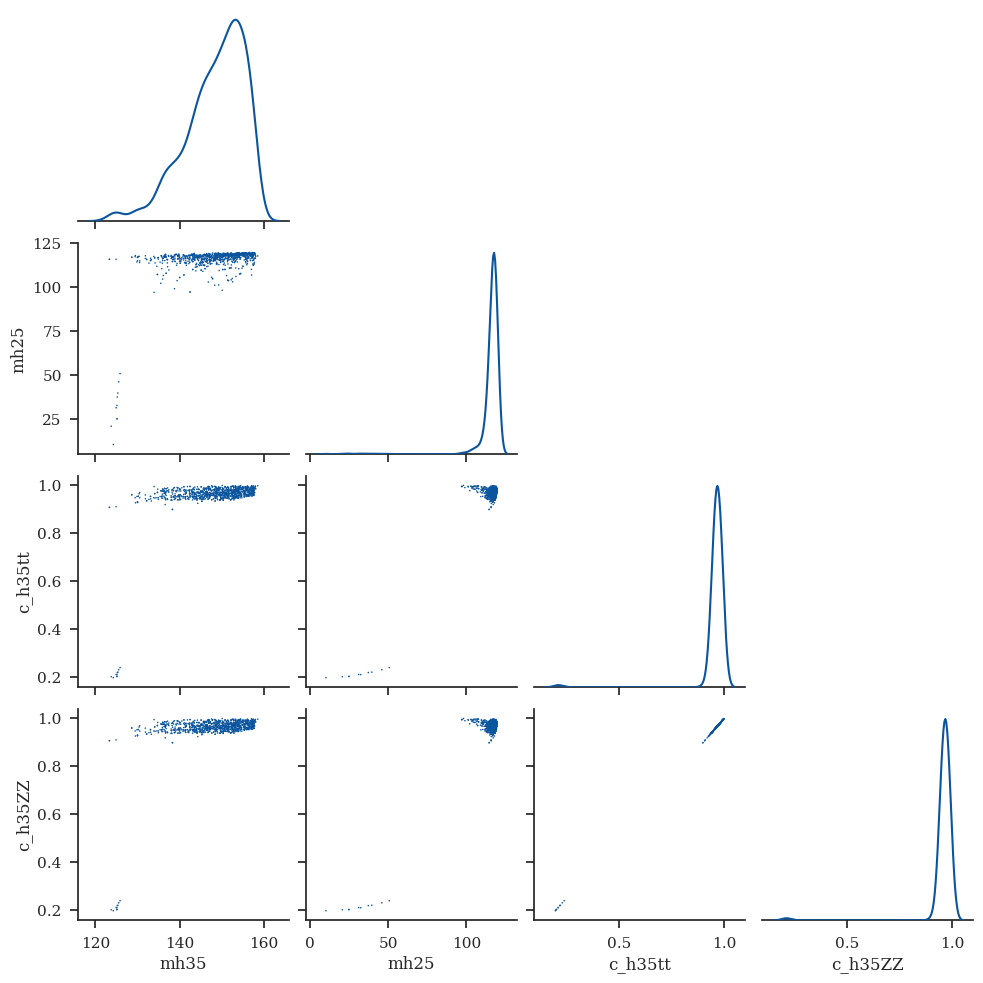

In [32]:
g = corner_plot(df.iloc[:,[*range(4,8)]], labels=None)

In [61]:
df.keys()

Index(['$BR_{BLSSM}(h25-\gamma\gamma)$', '$BR_{BLSSM}(h35-\gamma\gamma)$',
       '$BR_{BLSSM}(h25-b\overline{b})$', '$BR_{BLSSM}(h35-b\overline{b})$',
       '$m_{h_{35}}$', '$m_{h_{25}}$', '$c_{h_{35}tt}$', '$c_{h_{35}ZZ}$',
       '$logBR_{BLSSM}(h25-\gamma\gamma)$',
       '$logBR_{BLSSM}(h35-\gamma\gamma)$',
       '$logBR_{BLSSM}(h25-b\overline{b})$',
       '$logBR_{BLSSM}(h35-b\overline{b})$', '$\mu^{\gamma\gamma}$',
       '$\mu^{b \overline{b}}$'],
      dtype='object')

In [63]:
df['$\mu^{\gamma\gamma}$']=(df['$c_{h_{35}tt}$']**2)*(df['$BR_{BLSSM}(h25-\gamma\gamma)$']/df['$BR_{BLSSM}(h35-\gamma\gamma)$'])
df['$\mu^{b \overline{b}}$']=(df['$c_{h_{35}ZZ}$']**2)*(df['$BR_{BLSSM}(h25-b\overline{b})$']/df['$BR_{BLSSM}(h35-b\overline{b})$'])

In [33]:
h96SM_AA = 0.00144
h96SM_bb = 0.79357 
h125SM_AA = 2.28e-3
h125SM_bb = 5.77e-1

In [34]:
df['mu_aa']=(df['c_h35tt']**2)*(df['h25_aa']/ h96SM_AA  )
df['mu_bb']=(df['c_h35ZZ']**2)*(df['h25_bb']/ h96SM_bb )

In [66]:
df1= df[df['$\log\mu^{b \overline{b}}$'] > -2]

KeyError: '$\\log\\mu^{b \\overline{b}}$'

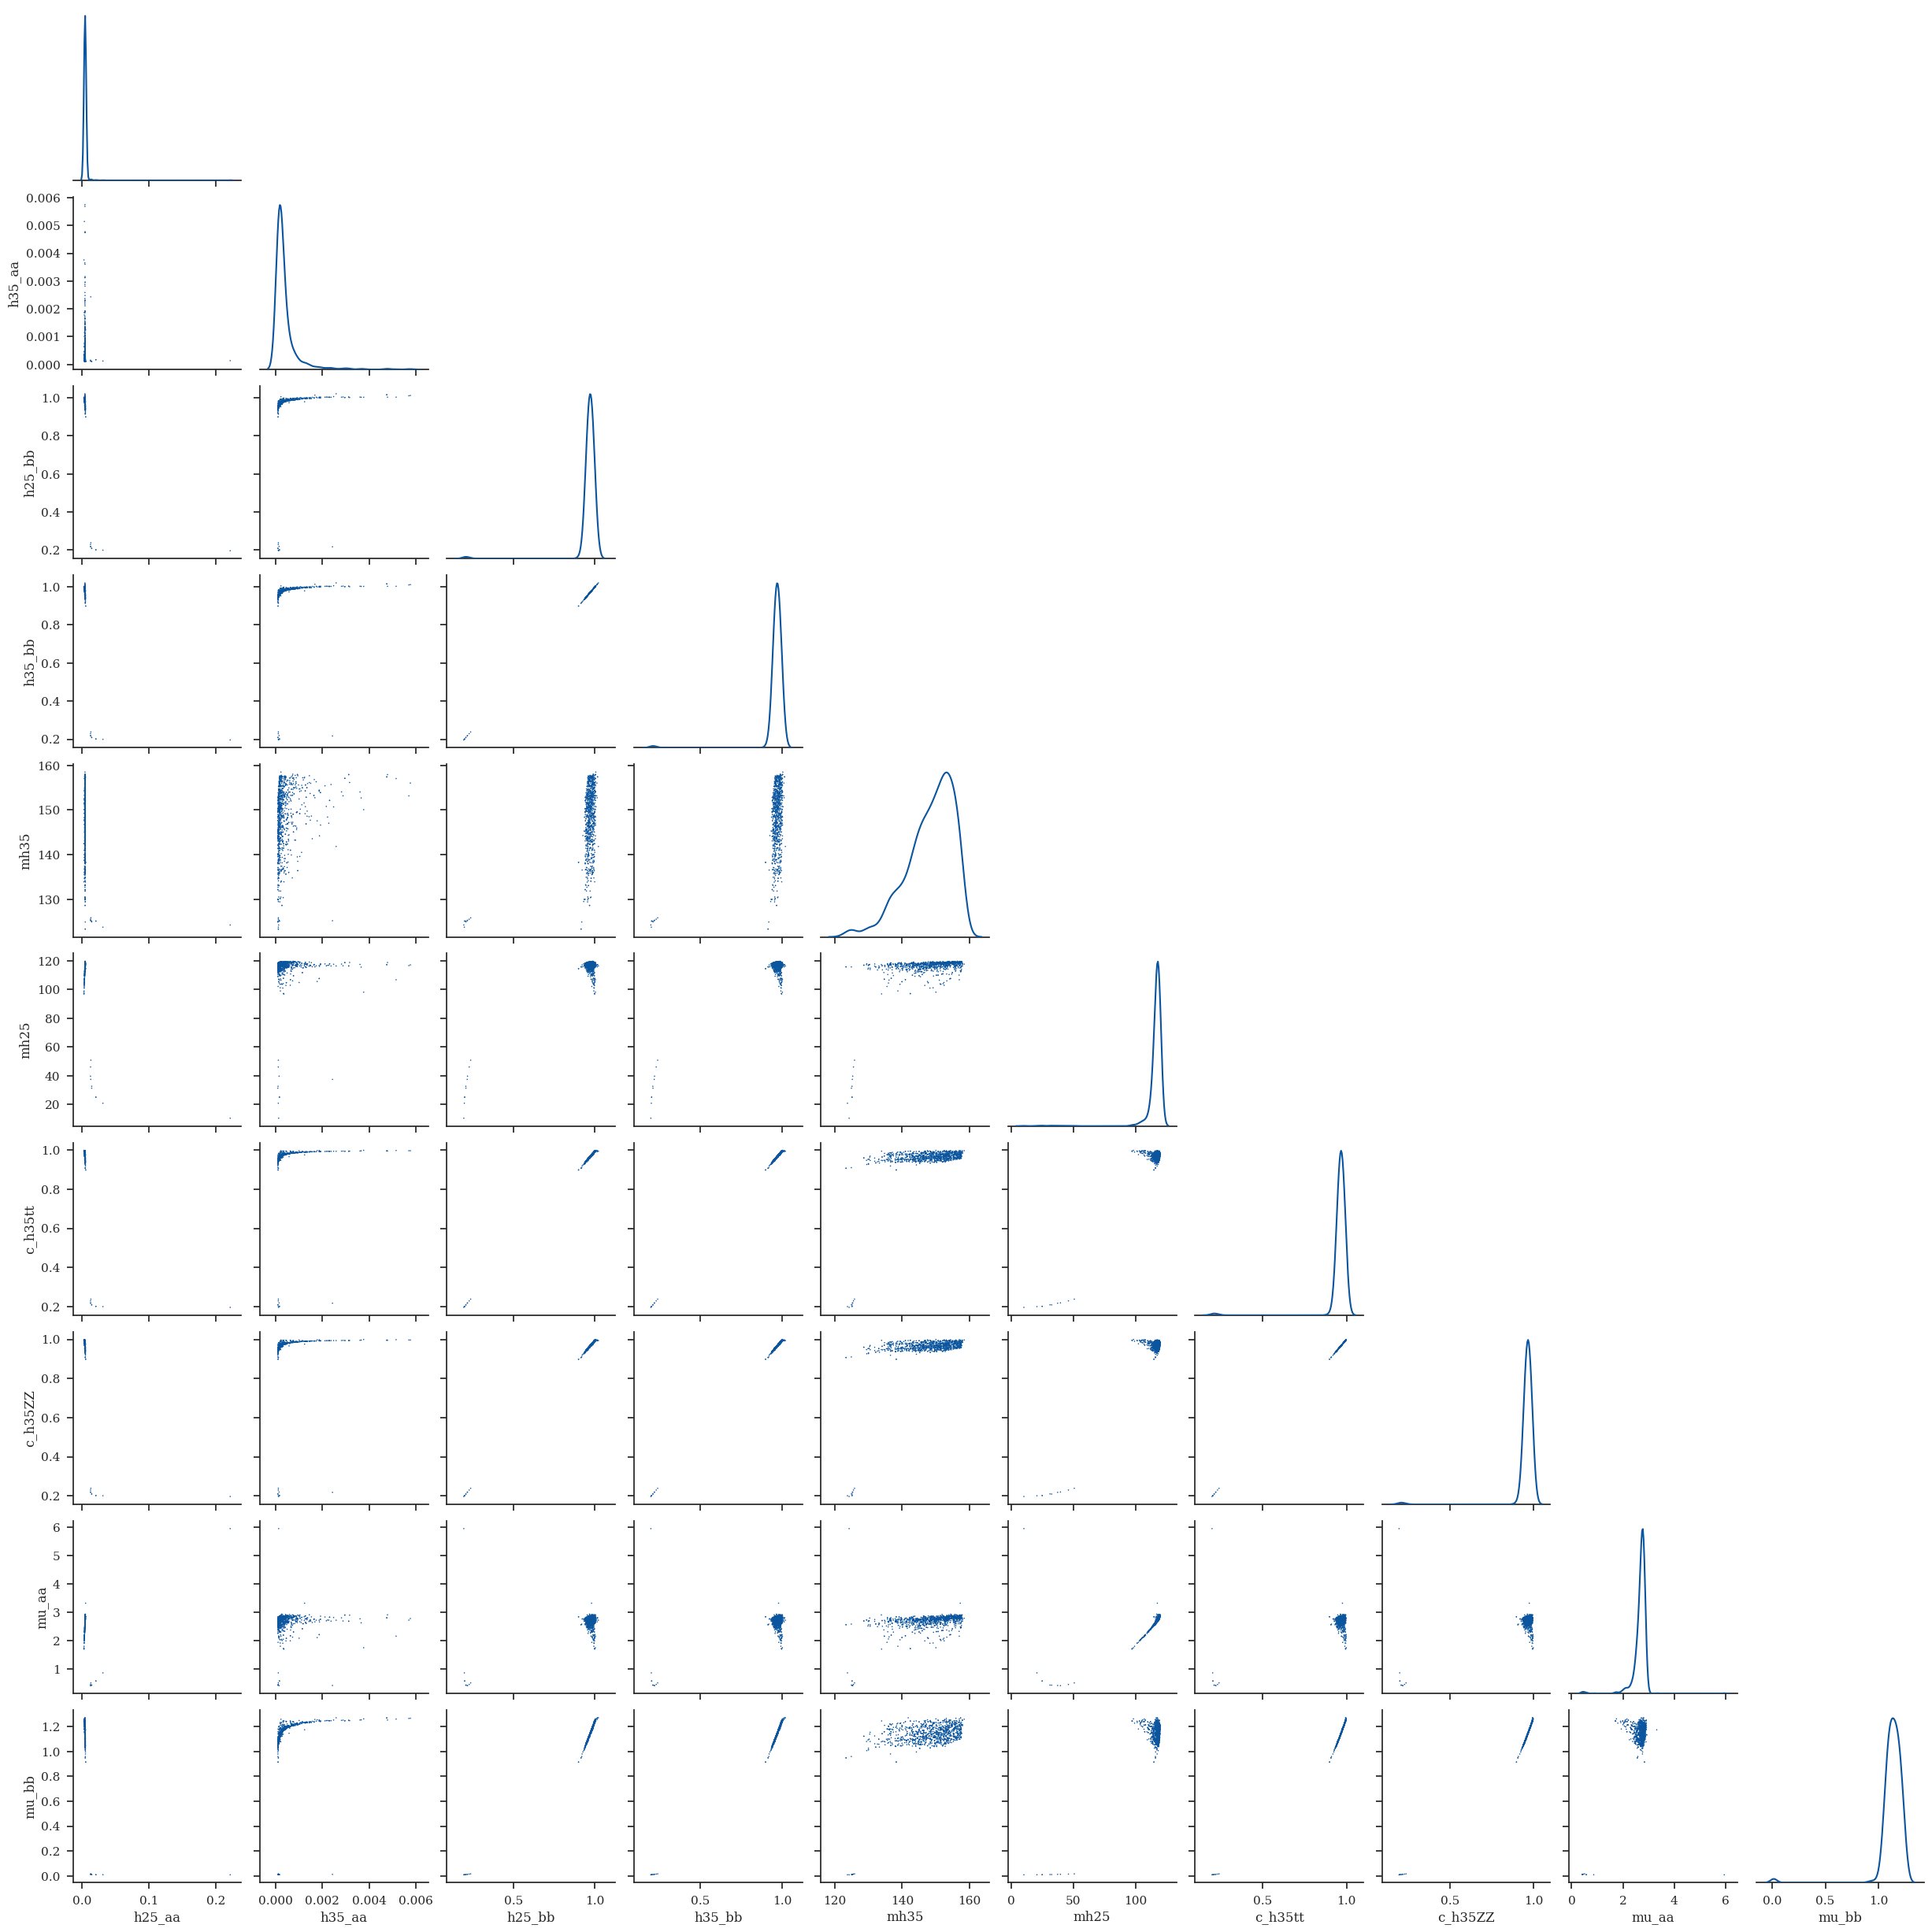

In [35]:
g = corner_plot(df, labels=None)

In [71]:
df.keys()

Index(['$BR_{BLSSM}(h25-\gamma\gamma)$', '$BR_{BLSSM}(h35-\gamma\gamma)$',
       '$BR_{BLSSM}(h25-b\overline{b})$', '$BR_{BLSSM}(h35-b\overline{b})$',
       '$m_{h_{35}}$', '$m_{h_{25}}$', '$c_{h_{35}tt}$', '$c_{h_{35}ZZ}$',
       '$logBR_{BLSSM}(h25-\gamma\gamma)$',
       '$logBR_{BLSSM}(h35-\gamma\gamma)$',
       '$logBR_{BLSSM}(h25-b\overline{b})$',
       '$logBR_{BLSSM}(h35-b\overline{b})$', '$\mu^{\gamma\gamma}$',
       '$\mu^{b \overline{b}}$', '$\mu^{b\overline{b}}$'],
      dtype='object')

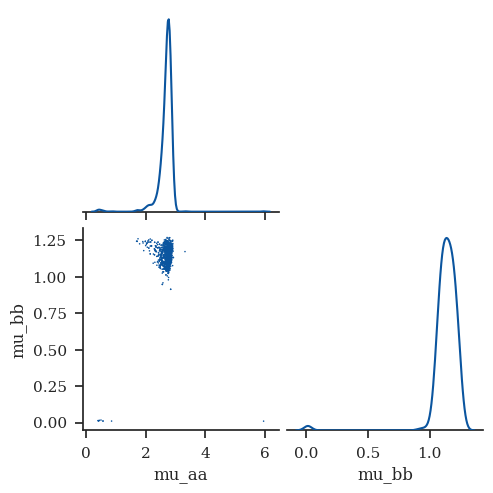

In [36]:
df_mus = df[['mu_aa','mu_bb']]
g = corner_plot(df_mus, labels=None)

In [88]:
tanbeta = np.random.uniform(1.1, 1.5, 1000)

mh=  np.random.uniform(80, 110, 1000)
m_12=np.sqrt(mh**2 *tanbeta/(1+tanbeta**2))

m_12.min()

54.446003084239045

# MSSM

In [55]:
mssm = HEPDataSet()

In [56]:
directory = Path('/mainfs/scratch/mjad1g20/ParameterScan/datasets_mssm_large/MSSM')
mssm.load_from_directory(directory, 0.2)

Output()

EOFError: corrupted files:  4


In [71]:
mssm

HEPDataSet. Size = 1500. Complete Stack Points = 1215

In [59]:
p = mssm.complete_stack_ids[0]
mssm[p]['SLHA']

SLHA: MSSM model: 128 blocks

In [60]:

idxs = mssm.complete_stack_ids
masses_35 = np.zeros(len(idxs))
masses_25 = np.zeros(len(idxs))
ggF_35 = np.zeros(len(idxs))
obsratios = np.zeros(len(idxs))
csqtotal = np.zeros(len(idxs))
pvalue = np.zeros(len(idxs))
for i,j in enumerate(idxs):
    masses_35[i] = mssm[j]['SLHA']['MASS'][35]
    masses_25[i] = mssm[j]['SLHA']['MASS'][25]
    obsratios[i] = mssm[j]['HiggsBounds']['obsratio']
    csqtotal[i] = mssm[j]['HiggsSignals']['csq(tot)']
    pvalue[i] = mssm[j]['HiggsSignals']['Pvalue']

In [61]:
df = pd.DataFrame({'$h_{25}$': masses_25, '$h_{35}$': masses_35, 'obsratios':np.log(obsratios), '$\chi^2_{total}$':csqtotal})
#filtered_df = df.loc[df['$h_{125}$'] < 130]
#filtered_df = filtered_df.loc[filtered_df['$h_{125}$'] > 120]

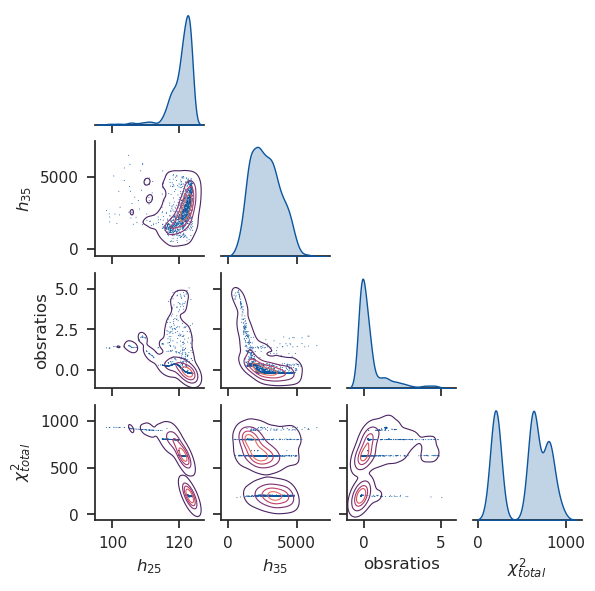

In [62]:
sns.set_theme(style="ticks")
sns.set_palette("Blues_r")

#sns.pairplot(df,corner=True)

g = sns.pairplot(
    df, 
    diag_kind="kde",
    corner=True, 
    plot_kws=dict(marker=".", s=2, edgecolor="none"), 
    diag_kws=dict(fill=True),
    height=1.5,
    )

#for ax in g.axes.ravel().reshape(4,4)[1:,1]:
#    ax.axvline(x=125, ls='--', linewidth=1.5, c=colors[1])
#for ax in g.axes.ravel().reshape(4,4)[:,0]:
#    ax.axvline(x=96, ls='--', linewidth=1.5, c=colors[1])

g.map_lower(sns.kdeplot, levels=5, cmap='flare_r', linewidths=0.8)
plt.show()

In [70]:
mssm[idx]['SLHA']

SLHA: MSSM model: 128 blocks

In [72]:
brs = []
for idx in mssm.complete_stack_ids:
    brs.append(mssm[idx]['SLHA']['DECAY1L 25'][2,22,22]);
    
brs

block not found


TypeError: 'NoneType' object is not subscriptable

# Plotly

In [104]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

colors = ['#D1512D','#F5C7A9', '#411530']
# create a subplot grid with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2)

# add scatter plot to the top left corner
#fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6], mode='markers'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['35'],  histnorm='probability', legendgroup='1',showlegend=False,  marker=dict(color='#F5C7A9')), row=1, col=1)

# add scatter plot to the top right corner
#fig.add_trace(go.Scatter(x=[7, 8, 9], y=[10, 11, 12], mode='markers'), row=1, col=2)

#add scatter plot to the bottom left corner
fig.add_trace(go.Scatter(
    x=df['35'], 
    y=df['25'], 
    mode='markers', 
    marker=dict(size=1, color='#F5C7A9'),
    legendgroup='1',
    name="first legend group",
    showlegend=True), row=2, col=1)


#fig.add_trace(go.Histogram2dContour(
#        x=masses_35, 
#        y=masses_25,
#        colorscale = 'Blues',
#        reversescale = False,
#    ), row=2, col=1)

# add 2D histogram to the bottom right corner
#fig.add_trace(go.Histogram2d(x=[1, 2, 3, 4, 5], y=[6, 7, 8, 9, 10]), row=2, col=2)

# Theme: 'plotly', 'plotly_white', 'plotly_dark', 'ggplot2', 'seaborn', 'simple_white',
fig.update_layout(template='plotly_white')
#fig.update_xaxes(title='X-axis 1', range=[0, 6000], row=1, col=1)
fig.update_yaxes(title='Y-axis 1', row=1, col=1)
fig.update_xaxes(title=r'$H_{96}$', range=[0, 6000], row=2, col=1)
fig.update_yaxes(title='Y-axis 2', row=2, col=1)
#fig.update_yaxes(range=[0, 8])
fig.update_layout(
    title="Plot Title",
    #legend_title="Legend Title",
    font=dict(
        #family="Courier New, monospace",
        size=18,
        #color="RebeccaPurple"
    ))
fig.show()


In [27]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(x=masses_35, name='h_35', histnorm='probability density',
                           orientation='h', nbinsx=20), row=1, col=1)

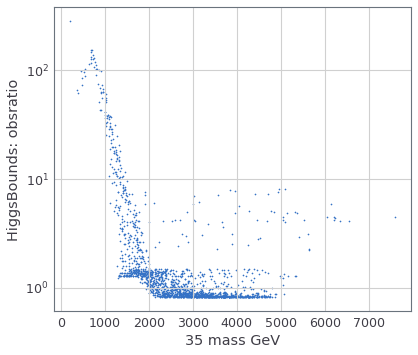

In [6]:
plt.scatter(masses, obsratios, s=2)
plt.yscale('log')
plt.ylabel('HiggsBounds: obsratio')
plt.xlabel(f'{particle} mass GeV')
plt.show()

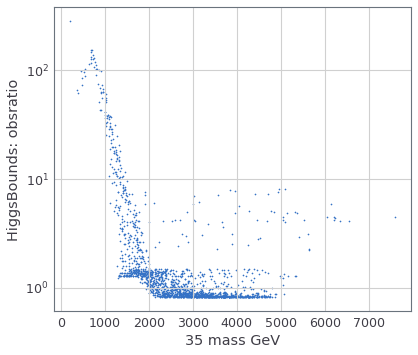

In [7]:
plt.scatter(masses, obsratios, s=2)
plt.yscale('log')
plt.ylabel('HiggsBounds: obsratio')
plt.xlabel(f'{particle} mass GeV')
plt.show()

Lets plot the mass decay width and cross sections

# THDM III

In [89]:
thdm = HEPDataSet()
directory = Path('/mainfs/scratch/mjad1g20/ParameterScan/datasets/THDMIII')
thdm.load_from_directory(directory, percentage=1.)

Output()

EOFError: corrupted files:  5


In [93]:
thdm[0]

{'LHE': {'MODSEL': {'entries': {'1': {'value': '1',
     'comment': '#  1/0: High/low scale input',
     'line': ' 1 1               #  1/0: High/low scale input \n'},
    '2': {'value': '1',
     'comment': '# Boundary Condition',
     'line': ' 2 1              # Boundary Condition  \n'},
    '6': {'value': '1',
     'comment': '# Generation Mixing',
     'line': ' 6 1               # Generation Mixing \n'}},
   'block_name': 'MODSEL',
   'block_comment': '#',
   'block_category': 'spheno_data',
   'header_line': 'Block MODSEL      #  \n'},
  'SMINPUTS': {'entries': {'2': {'value': '1.166370E-05',
     'comment': '# G_F,Fermi constant',
     'line': ' 2 1.166370E-05    # G_F,Fermi constant \n'},
    '3': {'value': '1.187000E-01',
     'comment': '# alpha_s(MZ) SM MSbar',
     'line': ' 3 1.187000E-01    # alpha_s(MZ) SM MSbar \n'},
    '4': {'value': '9.118870E+01',
     'comment': '# Z-boson pole mass',
     'line': ' 4 9.118870E+01    # Z-boson pole mass \n'},
    '5': {'value': '4